   area   price
0  2600  550000
1  3000  565000
2  3200  610000
3  3600  680000
4  4000  725000
[135.78767123]
180616.43835616432
[859554.79452055]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


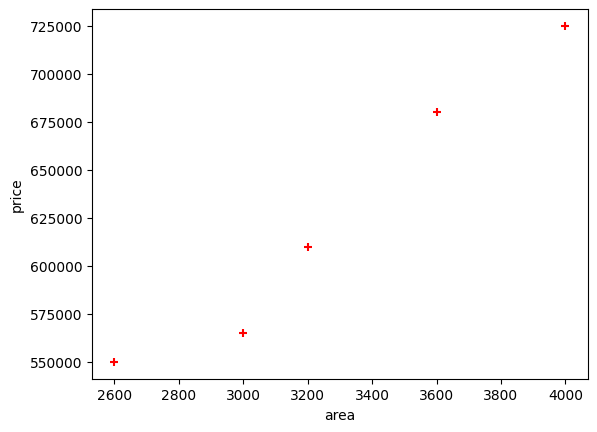

In [24]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

df = pd.read_csv('housing_area_price.csv')
print(df.head())

# Commented out IPython magic to ensure Python compatibility.
# %matplotlib inline
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,df.price,color='red',marker='+')

new_df = df.drop('price',axis='columns')
new_df

price = df.price
price

# Create linear regression object
reg = linear_model.LinearRegression()
reg.fit(new_df,price)

"""(1) Predict price of a home with area = 3300 sqr ft"""

reg.predict([[3300]])

print(reg.coef_)

print(reg.intercept_)

"""Y = m * X + b (m is coefficient and b is intercept)"""

3300*135.78767123 + 180616.43835616432

"""(1) Predict price of a home with area = 5000 sqr ft"""

print(reg.predict([[5000]]))

In [23]:
import pandas as pd
import numpy as np
from sklearn import linear_model

df = pd.read_csv('homeprices_Multiple_LR.csv')
df

"""Data Preprocessing: Fill NA values with median value of a column"""

df.bedrooms.median()

df.bedrooms = df.bedrooms.fillna(df.bedrooms.median())
df

reg = linear_model.LinearRegression()
reg.fit(df.drop('price',axis='columns'),df.price)

reg.coef_

reg.intercept_

"""Find price of home with 3000 sqr ft area, 3 bedrooms, 40 year old"""

reg.predict([[3000, 3, 40]])

112.06244194*3000 + 23388.88007794*3 + -3231.71790863*40 + 221323.00186540384

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


498408.25157402386

              year  per capita income (US$)
count    47.000000                47.000000
mean   1993.000000             18920.137063
std      13.711309             12034.679438
min    1970.000000              3399.299037
25%    1981.500000              9526.914515
50%    1993.000000             16426.725480
75%    2004.500000             27458.601420
max    2016.000000             42676.468370
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     47 non-null     int64  
 1   per capita income (US$)  47 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 884.0 bytes
None


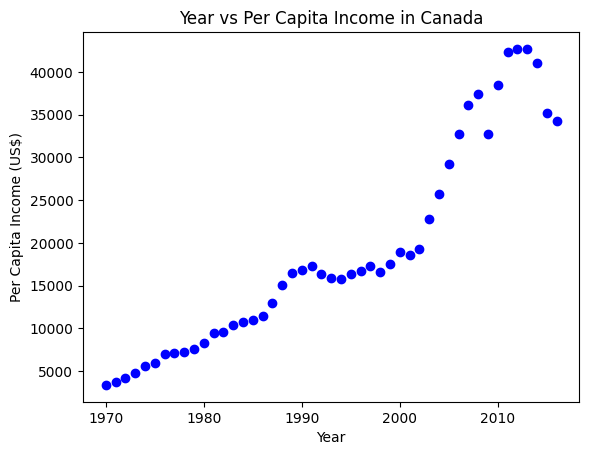

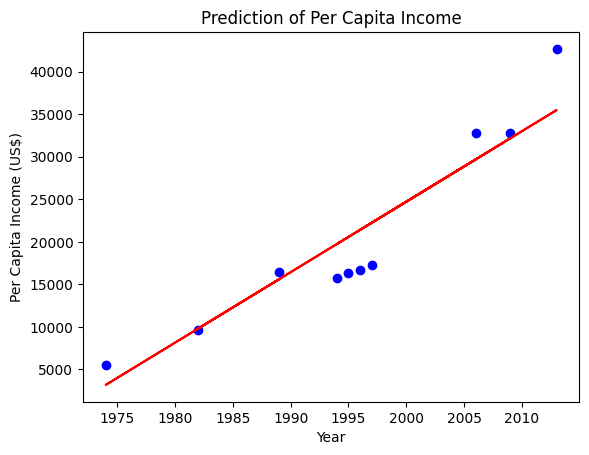

Coefficient: 828.4650752227104
Intercept: -1632210.7578554575
Predicted per capita income in 2020: 41288.69 US$


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load the dataset
data = pd.read_csv("canada_per_capita_income.csv")

# Analyze data distribution
print(data.describe())
print(data.info())

# Distribution plot visualization
plt.scatter(data['year'], data['per capita income (US$)'], color='blue', label='Actual Data')
plt.xlabel("Year")
plt.ylabel("Per Capita Income (US$)")
plt.title("Year vs Per Capita Income in Canada")

plt.show()

# Relationship between variables
X = data[['year']]
y = data['per capita income (US$)']

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X, y)

# Predict the results
y_pred = model.predict(X_test)

# Visualize prediction
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.xlabel("Year")
plt.ylabel("Per Capita Income (US$)")
plt.title("Prediction of Per Capita Income")

plt.show()

# Check values of coefficient and intercept
print(f"Coefficient: {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")

# Predict per capita income for 2020
y_2020 = model.predict([[2020]])
print(f"Predicted per capita income in 2020: {y_2020[0]:.2f} US$")

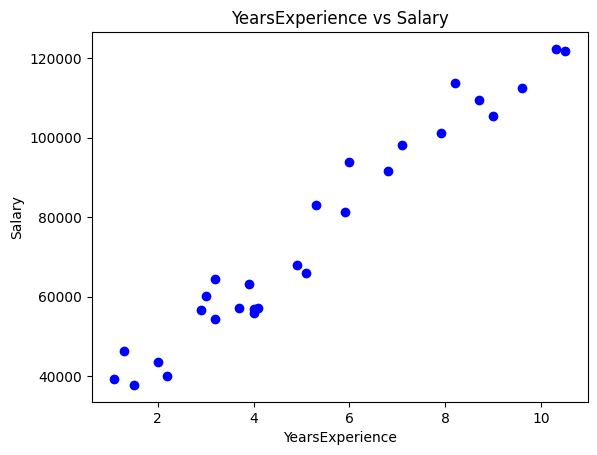

Missing values in dataset:
YearsExperience    2
Salary             0
dtype: int64


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


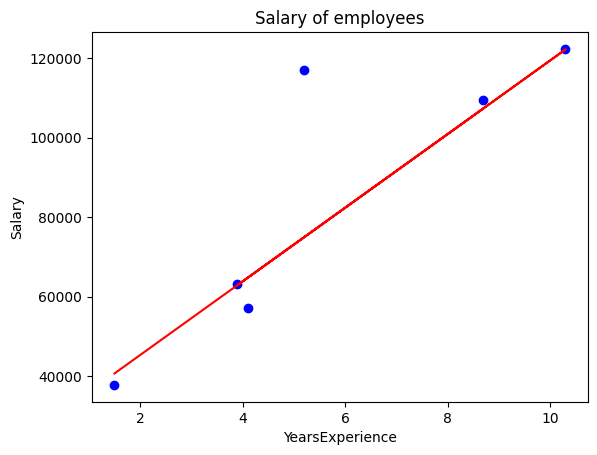

Predicted salary for 12 years of experience: 138005.61
Coefficient: 9275.46
Intercept: 26700.05
Mean Squared Error: 307288663.72


In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the dataset
df = pd.read_csv('salary.csv')

plt.scatter(df['YearsExperience'], df['Salary'], color='blue', label='Actual Data')
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.title("YearsExperience vs Salary")
plt.show()


# Check for missing values
print(f"Missing values in dataset:\n{df.isnull().sum()}")

# Drop rows with missing values (or you could fill them instead using df.fillna())
df['YearsExperience'] = df['YearsExperience'].fillna(df['YearsExperience'].mean())
df['Salary'] = df['Salary'].fillna(df['Salary'].mean())

# Define features (X) and target (y)
X = df[['YearsExperience']]
y = df['Salary']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict salary for 12 years of experience
years_experience = [[12]]
predicted_salary = model.predict(years_experience)


plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.title("Salary of employees")
plt.show()

# Print the results
print(f"Predicted salary for 12 years of experience: {predicted_salary[0]:.2f}")
print(f"Coefficient: {model.coef_[0]:.2f}")
print(f"Intercept: {model.intercept_:.2f}")

# Calculate and print the error (Mean Squared Error)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")


       experience  test_score(out of 10)  interview_score(out of 10)  \
count    5.000000               5.000000                    5.000000   
mean     5.600000               7.800000                    8.200000   
std      3.577709               1.643168                    1.788854   
min      2.000000               6.000000                    6.000000   
25%      3.000000               7.000000                    7.000000   
50%      5.000000               7.000000                    8.000000   
75%      7.000000               9.000000                   10.000000   
max     11.000000              10.000000                   10.000000   

          salary($)  
count      5.000000  
mean   67400.000000  
std     7987.490219  
min    60000.000000  
25%    62000.000000  
50%    65000.000000  
75%    70000.000000  
max    80000.000000  
<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 2 to 7
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
-

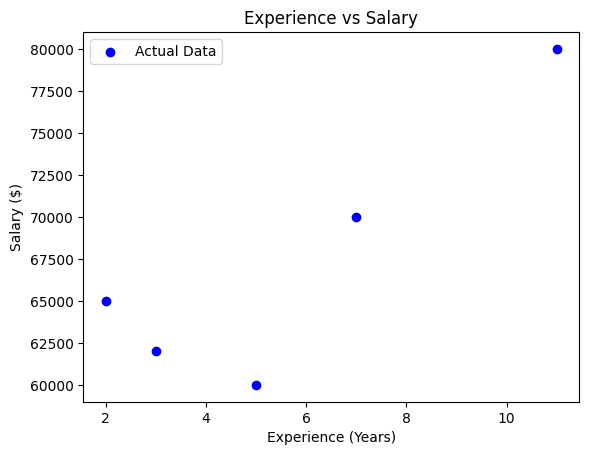

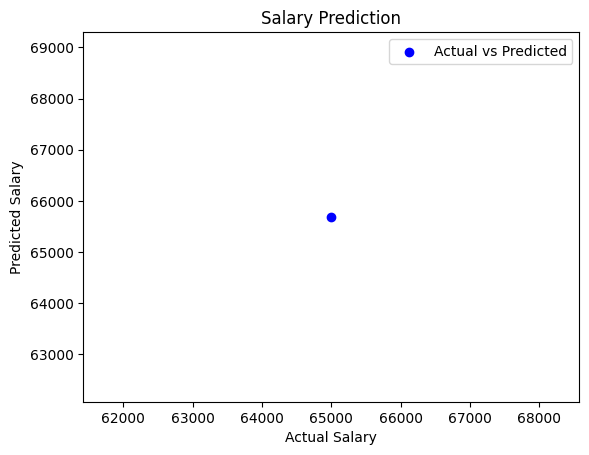

Coefficients: [2687.5 2125.  1750. ]
Intercept: 21562.500000000022
Predicted salary for 2 yrs experience, 9 test score, 6 interview score: 56562.50 US$
Predicted salary for 12 yrs experience, 10 test score, 10 interview score: 92562.50 US$
Mean Absolute Error (MAE): 687.50
Mean Squared Error (MSE): 472656.25
R-squared (R2) Score: nan


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [20]:
# Multiple linear regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv("hiring.csv")

# Function to convert experience from words to numbers
def convert_experience(value):
    word_to_num = {"zero": 0, "one": 1, "two": 2, "three": 3, "four": 4, "five": 5, "six": 6,
                   "seven": 7, "eight": 8, "nine": 9, "ten": 10, "eleven": 11, "twelve": 12}
    return word_to_num.get(value.lower(), value) if isinstance(value, str) else value

# Apply conversion
data['experience'] = data['experience'].apply(convert_experience)

# Handle missing values by removing rows with NaN
data = data.dropna()

# Convert all columns to numeric
data = data.astype(float)

# Analyze data distribution
print(data.describe())
print(data.info())

# Distribution plot visualization
plt.scatter(data['experience'], data['salary($)'], color='blue', label='Actual Data')
plt.xlabel("Experience (Years)")
plt.ylabel("Salary ($)")
plt.title("Experience vs Salary")
plt.legend()
plt.show()

# Relationship between variables
X = data[['experience', 'test_score(out of 10)', 'interview_score(out of 10)']]
y = data['salary($)']

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the results
y_pred = model.predict(X_test)

# Visualize prediction
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Salary Prediction")
plt.legend()
plt.show()

# Check values of coefficients and intercept
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")

# Predict salary for given candidates
candidates = np.array([[2, 9, 6], [12, 10, 10]])
salary_predictions = model.predict(candidates)
print(f"Predicted salary for 2 yrs experience, 9 test score, 6 interview score: {salary_predictions[0]:.2f} US$")
print(f"Predicted salary for 12 yrs experience, 10 test score, 10 interview score: {salary_predictions[1]:.2f} US$")

# Calculate errors
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")


           R&D Spend  Administration  Marketing Spend         Profit  \
count    1000.000000     1000.000000      1000.000000    1000.000000   
mean    81668.927200   122963.897612    226205.058419  119546.164656   
std     46537.567891    12613.927535     91578.393542   42888.633848   
min         0.000000    51283.140000         0.000000   14681.400000   
25%     43084.500000   116640.684850    150969.584600   85943.198543   
50%     79936.000000   122421.612150    224517.887350  117641.466300   
75%    124565.500000   129139.118000    308189.808525  155577.107425   
max    165349.200000   321652.140000    471784.100000  476485.430000   

       State_Florida  State_New York  
count    1000.000000     1000.000000  
mean        0.322000        0.334000  
std         0.467477        0.471876  
min         0.000000        0.000000  
25%         0.000000        0.000000  
50%         0.000000        0.000000  
75%         1.000000        1.000000  
max         1.000000        1.000000  


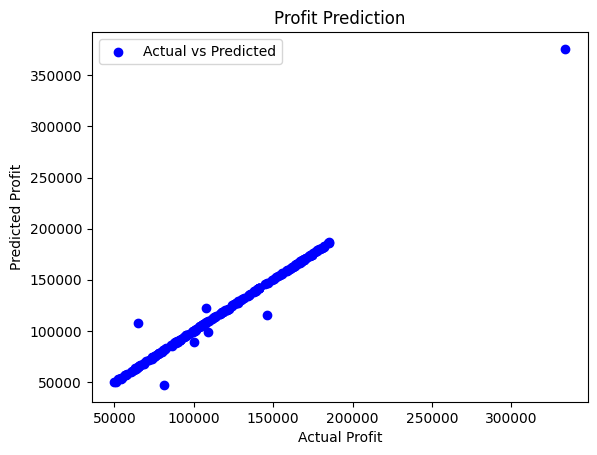

Coefficients: [ 5.33045605e-01  1.13893831e+00  8.30755037e-02 -8.74491486e+02
 -9.71337988e+01]
Intercept: -82439.15560711118
Predicted profit for given candidate: 554066.30 US$
Mean Absolute Error (MAE): 1404.44
Mean Squared Error (MSE): 30775142.86
R-squared (R2) Score: 0.98


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv("1000_Companies.csv")

# Handle missing values by removing rows with NaN
data = data.dropna()

# Encode categorical variable (State) using OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False)
state_encoded = encoder.fit_transform(data[['State']])
state_encoded_df = pd.DataFrame(state_encoded, columns=encoder.get_feature_names_out(['State']))

# Concatenate encoded state data with original dataset
data = pd.concat([data.drop(['State'], axis=1), state_encoded_df], axis=1)

# Analyze data distribution
print(data.describe())
print(data.info())

# Define independent (X) and dependent (y) variables
X = data[['R&D Spend', 'Administration', 'Marketing Spend'] + list(state_encoded_df.columns)]
y = data['Profit']

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the results
y_pred = model.predict(X_test)

# Visualize prediction
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
plt.xlabel("Actual Profit")
plt.ylabel("Predicted Profit")
plt.title("Profit Prediction")
plt.legend()
plt.show()

# Check values of coefficients and intercept
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")

# Predict profit for given candidate dynamically
state_names = encoder.get_feature_names_out(['State'])
florida_encoded = (state_names == "State_Florida").astype(int)
candidate_features = np.array([91694.48, 515841.3, 11931.24] + list(florida_encoded)).reshape(1, -1)
profit_prediction = model.predict(candidate_features)
print(f"Predicted profit for given candidate: {profit_prediction[0]:.2f} US$")

# Calculate errors
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")